# Mutual Information

In probability theory and information theory, the mutual information (MI) of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" (in units such as shannons, commonly called bits) obtained about one random variable through observing the other random variable. The concept of mutual information is intricately linked to that of entropy of a random variable, a fundamental notion in information theory that quantifies the expected "amount of information" held in a random variable.

Not limited to real-valued random variables like the correlation coefficient, MI is more general and determines how similar the joint distribution of the pair (X,Y) is to the product of the marginal distributions of X and Y. MI is the expected value of the pointwise mutual information (PMI).

https://en.wikipedia.org/wiki/Mutual_information

Python package: 
    
**minepy**: Maximal Information-based Nonparametric Exploration

In [1]:
# First Example

import numpy as np
from minepy import MINE

def print_stats(mine):
    print("MIC", mine.mic())
    print("MAS", mine.mas())
    print("MEV", mine.mev())
    print("MCN (eps=0)", mine.mcn(0))
    print("MCN (eps=1-MIC)", mine.mcn_general())
    print("GMIC", mine.gmic())
    print("TIC", mine.tic())

x = np.linspace(0, 1, 1000)
y = np.sin(10 * np.pi * x) + x
mine = MINE(alpha=0.6, c=15, est="mic_approx")
mine.compute_score(x, y)

print("Without noise:")
print_stats(mine)
print()

np.random.seed(0)
y += np.random.uniform(-1, 1, x.shape[0]) # add some noise
mine.compute_score(x, y)

print("With noise:")
print_stats(mine)

Without noise:
MIC 1.0000000000000002
MAS 0.7260715743736172
MEV 1.0000000000000002
MCN (eps=0) 4.584962500721157
MCN (eps=1-MIC) 4.584962500721157
GMIC 0.7793602519010566
TIC 67.66122955319294

With noise:
MIC 0.5057166934173714
MAS 0.3653999042616394
MEV 0.5057166934173714
MCN (eps=0) 5.954196310386876
MCN (eps=1-MIC) 3.8073549220576037
GMIC 0.3594755013532375
TIC 28.749832695303994


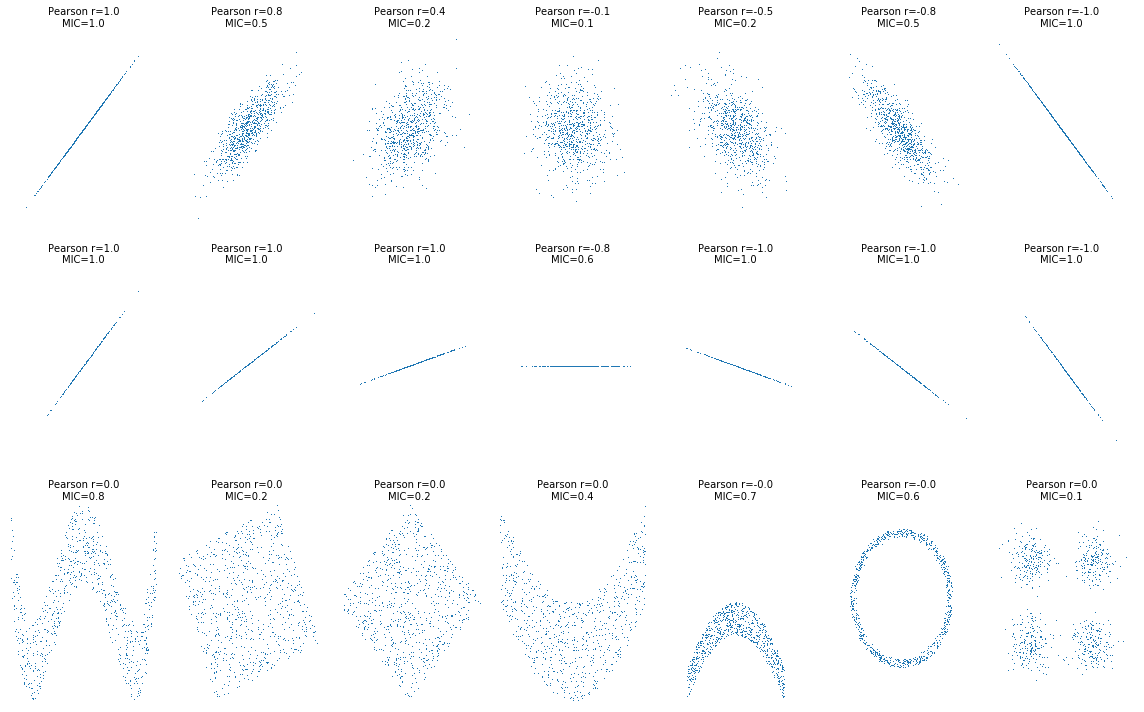

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from minepy import MINE


rs = np.random.RandomState(seed=0)

def mysubplot(x, y, numRows, numCols, plotNum,
              xlim=(-4, 4), ylim=(-4, 4)):

    r = np.around(np.corrcoef(x, y)[0, 1], 1)
    mine = MINE(alpha=0.6, c=15, est="mic_approx")
    mine.compute_score(x, y)
    mic = np.around(mine.mic(), 1)
    ax = plt.subplot(numRows, numCols, plotNum,
                     xlim=xlim, ylim=ylim)
    ax.set_title('Pearson r=%.1f\nMIC=%.1f' % (r, mic),fontsize=10)
    ax.set_frame_on(False)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.plot(x, y, ',')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

def rotation(xy, t):
    return np.dot(xy, [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]])

def mvnormal(n=1000):
    cors = [1.0, 0.8, 0.4, 0.0, -0.4, -0.8, -1.0]
    for i, cor in enumerate(cors):
        cov = [[1, cor],[cor, 1]]
        xy = rs.multivariate_normal([0, 0], cov, n)
        mysubplot(xy[:, 0], xy[:, 1], 3, 7, i+1)

def rotnormal(n=1000):
    ts = [0, np.pi/12, np.pi/6, np.pi/4, np.pi/2-np.pi/6,
          np.pi/2-np.pi/12, np.pi/2]
    cov = [[1, 1],[1, 1]]
    xy = rs.multivariate_normal([0, 0], cov, n)
    for i, t in enumerate(ts):
        xy_r = rotation(xy, t)
        mysubplot(xy_r[:, 0], xy_r[:, 1], 3, 7, i+8)

def others(n=1000):
    x = rs.uniform(-1, 1, n)
    y = 4*(x**2-0.5)**2 + rs.uniform(-1, 1, n)/3
    mysubplot(x, y, 3, 7, 15, (-1, 1), (-1/3, 1+1/3))

    y = rs.uniform(-1, 1, n)
    xy = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1)), axis=1)
    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2+np.sqrt(2)) / np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 16, (-lim, lim), (-lim, lim))

    xy = rotation(xy, -np.pi/8)
    lim = np.sqrt(2)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 17, (-lim, lim), (-lim, lim))

    y = 2*x**2 + rs.uniform(-1, 1, n)
    mysubplot(x, y, 3, 7, 18, (-1, 1), (-1, 3))

    y = (x**2 + rs.uniform(0, 0.5, n)) * \
        np.array([-1, 1])[rs.randint(0, 1, size=n)]
    mysubplot(x, y, 3, 7, 19, (-1.5, 1.5), (-1.5, 1.5))

    y = np.cos(x * np.pi) + rs.uniform(0, 1/8, n)
    x = np.sin(x * np.pi) + rs.uniform(0, 1/8, n)
    mysubplot(x, y, 3, 7, 20, (-1.5, 1.5), (-1.5, 1.5))

    xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
    xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
    xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
    xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
    xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
    mysubplot(xy[:, 0], xy[:, 1], 3, 7, 21, (-7, 7), (-7, 7))

plt.figure(facecolor='white', figsize=(16, 10))
mvnormal(n=800)
rotnormal(n=200)
others(n=800)
plt.tight_layout()
plt.savefig('../figures/mutual_information_example.png', bbox_inches="tight")